In [12]:
import matplotlib.pyplot as plt
import networkx as nx

import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.data import HeteroData
from torch_geometric.utils import to_networkx

# Visualize an example of a homogeneous graph:

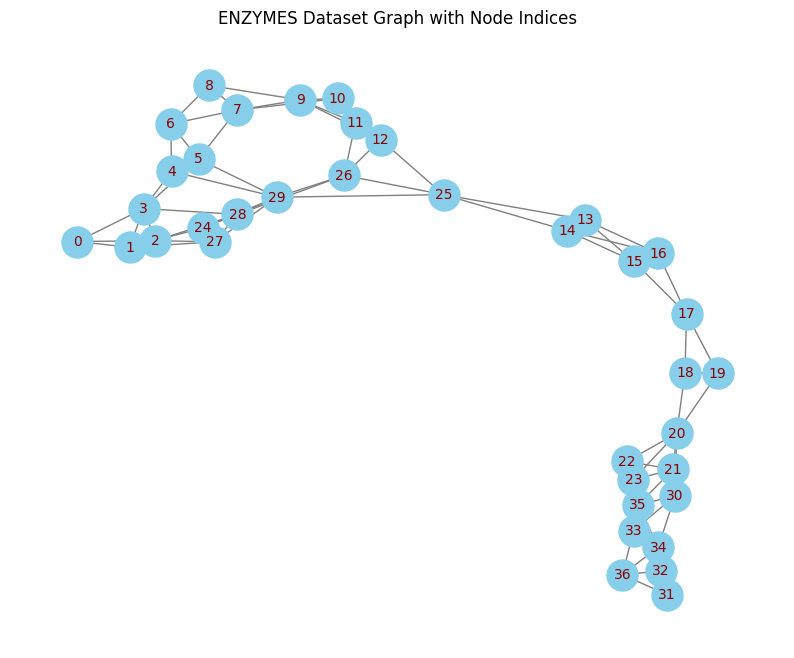

In [ ]:
# Load the ENZYMES dataset
dataset = TUDataset(root='data', name='ENZYMES')                          # This has 3 one-hot encodings
dataset_attr = TUDataset(root='data', name='ENZYMES', use_node_attr=True) # This has 3 one-hot encodings and 18 features

# Get the first graph from the dataset
data = dataset[0]

# Convert PyG graph to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Set up the plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1.0, edge_color='gray')

# Add node labels (indices)
nx.draw_networkx_labels(G, pos, labels={i: i for i in G.nodes()}, font_size=10, font_color='darkred')

# Remove axes
plt.axis('off')

# Show the graph
plt.title("ENZYMES Dataset Graph with Node Indices")
plt.show()

In [14]:
dataset[0]["edge_index"]

tensor([[ 0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12,
         12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16,
         16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 20,
         21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25,
         25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28,
         28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 32,
         32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35,
         35, 35, 36, 36, 36, 36],
        [ 1,  2,  3,  0,  2,  3, 24, 27,  0,  1,  3, 27, 28,  0,  1,  2,  4,  5,
         28,  3,  5,  6, 29,  3,  4,  6,  7, 29,  4,  5,  7,  8,  5,  6,  8,  9,
         10,  6,  7,  9,  7,  8, 10, 11, 12,  7,  9, 11, 12,  9, 10, 12, 26

In [15]:
dataset[0]["x"]

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [16]:
dataset[0]["y"]

tensor([5])

# Convert homogeneous graphs into heterogeneous graphs for ENZYMES dataset:

In [111]:
hom_data_1 = dataset[61]
hom_data_2 = dataset_attr[61]
hom_data_1, hom_data_2

(Data(edge_index=[2, 140], x=[39, 3], y=[1]),
 Data(edge_index=[2, 140], x=[39, 21], y=[1]))

In [ ]:
def get_node_type_mapping(hom_data, onehot_indices, expected_types):
    """
    Identify node types using one-hot columns and map them to string labels.
    
    Args:
        hom_data: Homogeneous graph data with node features.
        onehot_indices: Column indices for one-hot type encoding (e.g., [0, 1, 2]).
        expected_types: List of string labels (e.g., ["A", "B", "C"]).
    
    Returns:
        Dictionary mapping string labels to node indices (e.g., {"A": [0, 1], "B": [2]}).
    """
    type_dict = {}
    onehot_features = hom_data.x[:, onehot_indices]
    
    for node_idx, node in enumerate(onehot_features):
        # Get onehot encoded index
        type_idx = int(torch.argmax(node)) 
        if type_idx >= len(expected_types):
            raise ValueError(f"One-hot index {type_idx} is out of bounds for expected_types {expected_types}")
        
        # Map onehot indicies to expected types (e.g. 0 -> "A")
        type_label = expected_types[type_idx]
        if type_label not in type_dict:
            type_dict[type_label] = []
        type_dict[type_label].append(node_idx)
    
    return type_dict

In [ ]:
def create_mapping_dict(type_dict):
    """
    Create ID mapping dictionaries for all node types.
    
    This resets node indices for each node type in the heterogeneous graph.
    """
    return {t: {orig_idx: new_idx for new_idx, orig_idx in enumerate(nodes)}
            for t, nodes in type_dict.items()}

In [ ]:
def filter_and_remap_edges(hom_data, src_type_nodes, dst_type_nodes, 
                           src_map, dst_map, enforce_canonical):
    """
    Filter edges from hom_data.edge_index where source is in src_type_nodes and
    destination is in dst_type_nodes, and remap original node indices to new indices.
    
    If enforce_canonical is True, reorders each edge (min first) and removes duplicates.
    """
    src_tensor = torch.tensor(src_type_nodes)
    dst_tensor = torch.tensor(dst_type_nodes)
    
    # Create mask over homogeneous edge_index
    mask = torch.isin(hom_data.edge_index[0], src_tensor) & torch.isin(hom_data.edge_index[1], dst_tensor)
    filtered_edges = hom_data.edge_index[:, mask]
    
    if filtered_edges.numel() == 0:
        return torch.empty((2, 0), dtype=torch.long)
    
    src_indices = torch.tensor([src_map[orig.item()] for orig in filtered_edges[0]])
    dst_indices = torch.tensor([dst_map[orig.item()] for orig in filtered_edges[1]])
    edge_index = torch.stack([src_indices, dst_indices])
    
    if enforce_canonical:
        # Reorder each edge so that the smaller index is first.
        reordered_src = torch.min(edge_index[0], edge_index[1])
        reordered_dst = torch.max(edge_index[0], edge_index[1])
        edge_index = torch.stack([reordered_src, reordered_dst])
        # Remove duplicate edges
        edge_index = torch.unique(edge_index, dim=1)
    
    return edge_index

In [ ]:
def convert_hom_to_het(
        hom_data, 
        onehot_indices=[0, 1, 2], 
        expected_types=["A", "B", "C"], 
        is_directed=True, 
        enforce_canonical=False, 
        include_meta=True):
    """
    Convert a homogeneous graph (with node features that include one-hot splitting columns)
    to a heterogeneous graph.
    
    Parameters:
      - expected_types: list of possible node types (e.g., [0, 1, 2])
      - is_directed: if True, treat the graph as directed; if False, as undirected.
      - enforce_canonical: used when is_directed is False; reorders edges and removes duplicates.
      - onehot_indices: list of column indices in hom_data.x used for one-hot splitting.
      
    All columns not in onehot_indices are treated as additional node features.
    If no additional columns exist, a tensor of ones is used.
    """
    het_data = HeteroData()
    
    # Determine node types based on the one-hot splitting columns.
    type_dict = get_node_type_mapping(hom_data, onehot_indices, expected_types)
    mapping_dict = create_mapping_dict(type_dict)
    
    # Determine additional feature indices (all columns not in onehot_indices).
    total_dim = hom_data.x.shape[1]
    additional_indices = sorted(list(set(range(total_dim)) - set(onehot_indices)))
    
    # Add node features for each expected type.
    for t in expected_types:
        nodes = type_dict.get(t, [])
        if nodes:
            if additional_indices:
                # Use the additional features.
                het_data[str(t)].x = hom_data.x[torch.tensor(nodes, dtype=torch.long)][:, additional_indices]
            else:
                # Default to a tensor of ones.
                het_data[str(t)].x = torch.ones((len(nodes), 1), dtype=hom_data.x.dtype)
        else:
            # No nodes of this type, so add an empty tensor with appropriate feature dim.
            feat_dim = len(additional_indices) if additional_indices else 1
            het_data[str(t)].x = torch.empty((0, feat_dim), dtype=hom_data.x.dtype)
    
    # Process edges
    if is_directed:
        type_pairs = [(src, dst) for src in expected_types for dst in expected_types]
    else:
        type_pairs = [(src, dst) for i, src in enumerate(expected_types) for dst in expected_types[i:]]
    
    for src_type, dst_type in type_pairs:
        edge_type = (str(src_type), "connects", str(dst_type))
        src_nodes = type_dict.get(src_type, [])
        dst_nodes = type_dict.get(dst_type, [])
        
        edge_index = filter_and_remap_edges(
            hom_data,
            src_nodes,
            dst_nodes,
            mapping_dict.get(src_type, {}),
            mapping_dict.get(dst_type, {}),
            enforce_canonical=enforce_canonical
        )
        het_data[edge_type].edge_index = edge_index
    
    # Optionally add extra metadata (this key won't be used by PyG for training)
    if include_meta:
        het_data.meta = {"converted_from": "homogeneous", "is_directed": is_directed, "onehot_indices": onehot_indices}
    
    # Preserve graph-level label if it exists
    if hasattr(hom_data, 'y'):
        het_data.y = hom_data.y
    
    return het_data


# Test conversion with different edge cases:

In [115]:
# Since we only have onehot, we expect features to be torch.ones()
for i in (0, 10, 61, 115, 200):
    het1 = convert_hom_to_het(dataset[i], is_directed=False, include_meta=False)
    print(het1)

HeteroData(
  y=[1],
  A={ x=[24, 1] },
  B={ x=[13, 1] },
  C={ x=[0, 1] },
  (A, connects, A)={ edge_index=[2, 86] },
  (A, connects, B)={ edge_index=[2, 17] },
  (A, connects, C)={ edge_index=[2, 0] },
  (B, connects, B)={ edge_index=[2, 48] },
  (B, connects, C)={ edge_index=[2, 0] },
  (C, connects, C)={ edge_index=[2, 0] }
)
HeteroData(
  y=[1],
  A={ x=[0, 1] },
  B={ x=[0, 1] },
  C={ x=[4, 1] },
  (A, connects, A)={ edge_index=[2, 0] },
  (A, connects, B)={ edge_index=[2, 0] },
  (A, connects, C)={ edge_index=[2, 0] },
  (B, connects, B)={ edge_index=[2, 0] },
  (B, connects, C)={ edge_index=[2, 0] },
  (C, connects, C)={ edge_index=[2, 12] }
)
HeteroData(
  y=[1],
  A={ x=[10, 1] },
  B={ x=[18, 1] },
  C={ x=[11, 1] },
  (A, connects, A)={ edge_index=[2, 4] },
  (A, connects, B)={ edge_index=[2, 18] },
  (A, connects, C)={ edge_index=[2, 12] },
  (B, connects, B)={ edge_index=[2, 24] },
  (B, connects, C)={ edge_index=[2, 23] },
  (C, connects, C)={ edge_index=[2, 6] }
)
Het

In [83]:
# Features other than onehot indicies should be kept
for i in (0, 10, 61, 115, 200):
    het2 = convert_hom_to_het(dataset_attr[i], onehot_indices=[18,19,20], is_directed=False, include_meta=False)
    print(het2)

HeteroData(
  y=[1],
  A={ x=[24, 18] },
  B={ x=[13, 18] },
  C={ x=[0, 18] },
  (A, connects, A)={ edge_index=[2, 86] },
  (A, connects, B)={ edge_index=[2, 17] },
  (A, connects, C)={ edge_index=[2, 0] },
  (B, connects, B)={ edge_index=[2, 48] },
  (B, connects, C)={ edge_index=[2, 0] },
  (C, connects, C)={ edge_index=[2, 0] }
)
HeteroData(
  y=[1],
  A={ x=[0, 18] },
  B={ x=[0, 18] },
  C={ x=[4, 18] },
  (A, connects, A)={ edge_index=[2, 0] },
  (A, connects, B)={ edge_index=[2, 0] },
  (A, connects, C)={ edge_index=[2, 0] },
  (B, connects, B)={ edge_index=[2, 0] },
  (B, connects, C)={ edge_index=[2, 0] },
  (C, connects, C)={ edge_index=[2, 12] }
)
HeteroData(
  y=[1],
  A={ x=[10, 18] },
  B={ x=[18, 18] },
  C={ x=[11, 18] },
  (A, connects, A)={ edge_index=[2, 4] },
  (A, connects, B)={ edge_index=[2, 18] },
  (A, connects, C)={ edge_index=[2, 12] },
  (B, connects, B)={ edge_index=[2, 24] },
  (B, connects, C)={ edge_index=[2, 23] },
  (C, connects, C)={ edge_index=[2, 6

In [ ]:
# Homogeneous data for comparison
for i in (0, 10, 61, 115, 200):
    print(dataset[i])

Data(edge_index=[2, 168], x=[37, 3], y=[1])
Data(edge_index=[2, 12], x=[4, 3], y=[1])
Data(edge_index=[2, 140], x=[39, 3], y=[1])
Data(edge_index=[2, 148], x=[42, 3], y=[1])
Data(edge_index=[2, 106], x=[29, 3], y=[1])
